In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

### Dữ liệu được đo tại thành phố Szeged, Hungragy (UTC +2)

In [115]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Tiền xử lí

Đổi lại các tên cột bỏ đơn vị để dễ làm việc hơn

In [191]:
df.columns = ['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed',
       'Wind Bearing', 'Visibility', 'Loud Cover',
       'Pressure', 'Daily Summary']

Với cột Formatted Date, ta sẽ bỏ đi phần UTC phía sau vì dư thừa sau đó chuyển cột từ type string sang datetime

In [116]:
df['Formatted Date'] = df['Formatted Date'].apply(lambda x: x.split('+')[0])
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


#### Kiểm tra nhiệt độ theo từng tháng của từng năm 

In [205]:
df_temp=df.groupby([(df['Formatted Date'].dt.year),(df['Formatted Date'].dt.month)])['Temperature'].mean().unstack()

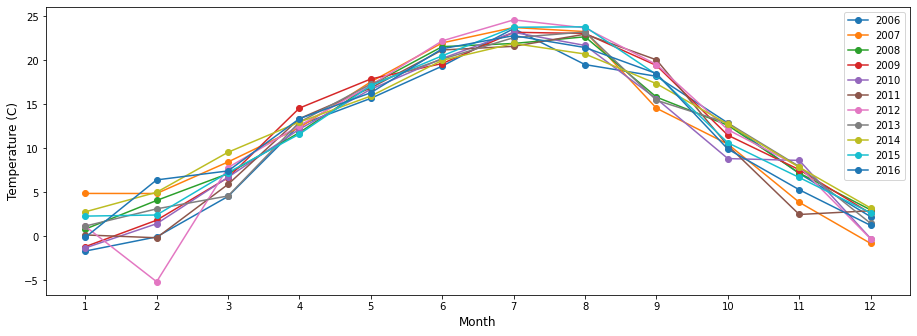

In [246]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
for i in range(2006,2017):
    plt.plot(df_temp.loc[i], marker='o',label=i)
plt.xticks(df_temp.columns)
plt.legend()
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.show()

Vào tháng 2 của năm 2012 thì nhiệt độ hạ thấp kỉ lục so trong suốt 11 năm ở đây.